# Guided Project: Predict Crowdedness at the Campus Gym using Stochastic Gradient Descent on Linear Regression

## Table of Contents 
1. [Introduction](#introduction)
2. [Understanding the Data](#understanding-data)
3. [EDA and Cleaning the Data](#eda)
4. [Preparing to Build Our Model](#preparing)
5. [Measure the Performance of the Model](#measure)
6. [Visualize the Results](#visualize)
7. [Summarized Results](#summarized)

## Introduction <a name="introduction"></a>

This is a project I completed based on a guide called "Stochastic Gradient Descent on Linear Regression" on the Dataquest learning platform. 

In this project I have learned new skills related to the Stochastic Gradient Descent on Linear Regression algorithm

The implementation is written in Python and is shown in Jupyter Notebooks.

### Goal of this project

If you're an avid workout guy or girl, you'll know that being at a crowded gym can be a bad experience. With this project, we'll investigate if we can predict the crowdedness of a campus gym based on several factors, such as time of the day, time of the year, whether its a semester start and what the outside temperature is.

We'll use a “Crowdedness at the Campus Gym” dataset, which contains historic information about how crowded the campus gym is on a given day and hour, as well as other information about the specific measurements.
Then we will train a machine learning model using the Stochastic Gradient Descent on Linear Regression algorithm, and evaluate whether the results it produces are good enough to accurately predict when and under what conditions the gym are least crowded.

![Fitness club illustration](img/predictgymcrowd/40237_1.jpg)

Source: [Image by macrovector on Freepik](https://www.freepik.com/free-vector/fitness-club-illustration_14739361.htm)

## Understanding the Data <a name="understanding-data"></a>

### Import the dependencies
First we need to import the basic required libraries: pandas, seaborn and matplotlib.pyplot.


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load and explore the data
The result of the movie ratings are stored in 1 file:
1. crowdness_gym_data.csv

In [52]:
# load files into dataframes
crowd_df = pd.read_csv("data/predictgymcrowd/crowdness_gym_data.csv")

In [53]:
# explore the crowd data
crowd_df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


The date column is of type object, but has a very much datetime format. However, there is a weird format of having a few characters at the end, namely "-07:00" or "-08:00". We'll deal with this when cleaning the data. 

In [54]:
# what columns, data types, size of dataset
crowd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


The data contains 1 categorical column: date. We can convert this to a datetime object later.

In [55]:
# min, max of numerical columns etc.
crowd_df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [56]:
# how does day_of_week map to the day name?
print(crowd_df[['day_of_week', 'is_weekend']].drop_duplicates())

     day_of_week  is_weekend
0              4           0
35             5           1
135            6           1
235            0           0
335            1           0
436            2           0
536            3           0


Some notes:
- there are 62'184 records in our dataset.
- the min value of `number_people` is 0, meaning that for some measurements, assumingly there were no people in the gym at that point in time.
- `day_of_week` ranges from the number 0 to 6. It appears that the start of the week is represented by 0, which is a Monday (which is also the standard for pandas)
- `month` ranges from 1 to 12 (January to December)
- `hour` ranges from 0 (midnight - 1am) to 23 (11am to midnight)

In [57]:
# empty values
crowd_df.isna().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

There are no empty values in the whole dataset.

In [58]:
# zero values
zero_columns = crowd_df.eq(0).sum()
zero_columns
# len(zero_columns)

number_people            8775
date                        0
timestamp                   1
day_of_week              8838
is_weekend              44594
is_holiday              62024
temperature                 0
is_start_of_semester    57282
is_during_semester      21129
month                       0
hour                     2978
dtype: int64

When looking at the columns containing zeros, the following are of interest: 
- `number_people`: there are measurements where there were no people in the gym at that point in time
- `timestamp`: there is one row which is 0, which symbolizes the start of time. This seems to be a data quality issue. 

The rest of the columns containing zeros are expected:
- the `is_` columns are boolean 0 or 1.
- the `hour`column are hours of the day, so 0 represents midnight.

In [59]:
# what is the row with timestamp = 0?
timestamp_eq_zero = crowd_df[crowd_df['timestamp'] == 0]
timestamp_eq_zero.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
41001,1,2016-08-23 00:00:00-07:00,0,1,0,0,59.46,0,0,8,0


The row where `timestamp` equals zero seems legit, so we won't drop this row (but we may drop this column.)

## EDA and Cleaning the Data <a name="eda"></a>

Let us now investigate the data in more detail. The aim is to select the features we think are useful and will help our predictions. Then we will remove the rest of the features.

First, let's clean the date column as mentioned before. 

In [60]:
# create a copy of the dataset for EDA
crowd_df_eda = crowd_df.copy()

# remove last part of date column containing "-07:00" or "-08:00"
crowd_df_eda['date_conv'] = crowd_df_eda['date'].str[:-6]
print(crowd_df_eda['date_conv'])

# convert date column to datetime data type
crowd_df_eda['date_conv'] = pd.to_datetime(crowd_df_eda['date_conv'], format='%Y-%m-%d %H:%M:%S')
crowd_df_eda.info()

0        2015-08-14 17:00:11
1        2015-08-14 17:20:14
2        2015-08-14 17:30:15
3        2015-08-14 17:40:16
4        2015-08-14 17:50:17
                ...         
62179    2017-03-18 18:42:28
62180    2017-03-18 18:52:35
62181    2017-03-18 19:02:40
62182    2017-03-18 19:12:47
62183    2017-03-18 19:22:51
Name: date_conv, Length: 62184, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   number_people         62184 non-null  int64         
 1   date                  62184 non-null  object        
 2   timestamp             62184 non-null  int64         
 3   day_of_week           62184 non-null  int64         
 4   is_weekend            62184 non-null  int64         
 5   is_holiday            62184 non-null  int64         
 6   temperature           62184 non-null  float64       
 7  

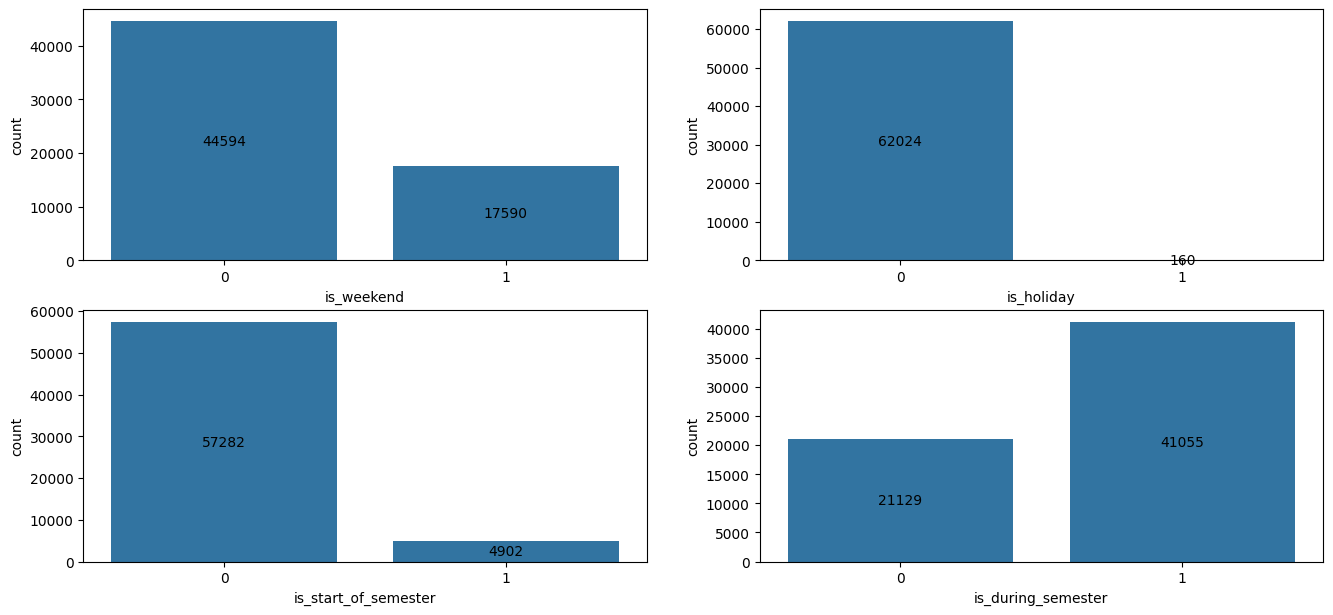

In [61]:
categorical_cols = ["is_weekend", "is_holiday", "is_start_of_semester", "is_during_semester"]

fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=crowd_df_eda[col], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

For all but one categorical column (`is_during_semester`) the values are very strongly leaning into one direction, namely "False" (0). 

In plain English, the gym is much more busy when:
- its not a weekend
- its not a holiday
- its not the start of the semester
The gym is a little more busy when its during a semester.

Using my experience of using gyms and being a student, the above observations make more or less sense.

#### Explore examples of the outcomes ('number_people') and the correlations
For the purpose of looking at correlations, we will temporarily remove the date column. Reason: we cannot do correlation on a string column.

In [62]:
crowd_df_corr = crowd_df.copy()
crowd_df_corr = crowd_df_corr.drop(columns=['date'], axis=1)
crowd_df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   timestamp             62184 non-null  int64  
 2   day_of_week           62184 non-null  int64  
 3   is_weekend            62184 non-null  int64  
 4   is_holiday            62184 non-null  int64  
 5   temperature           62184 non-null  float64
 6   is_start_of_semester  62184 non-null  int64  
 7   is_during_semester    62184 non-null  int64  
 8   month                 62184 non-null  int64  
 9   hour                  62184 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.7 MB


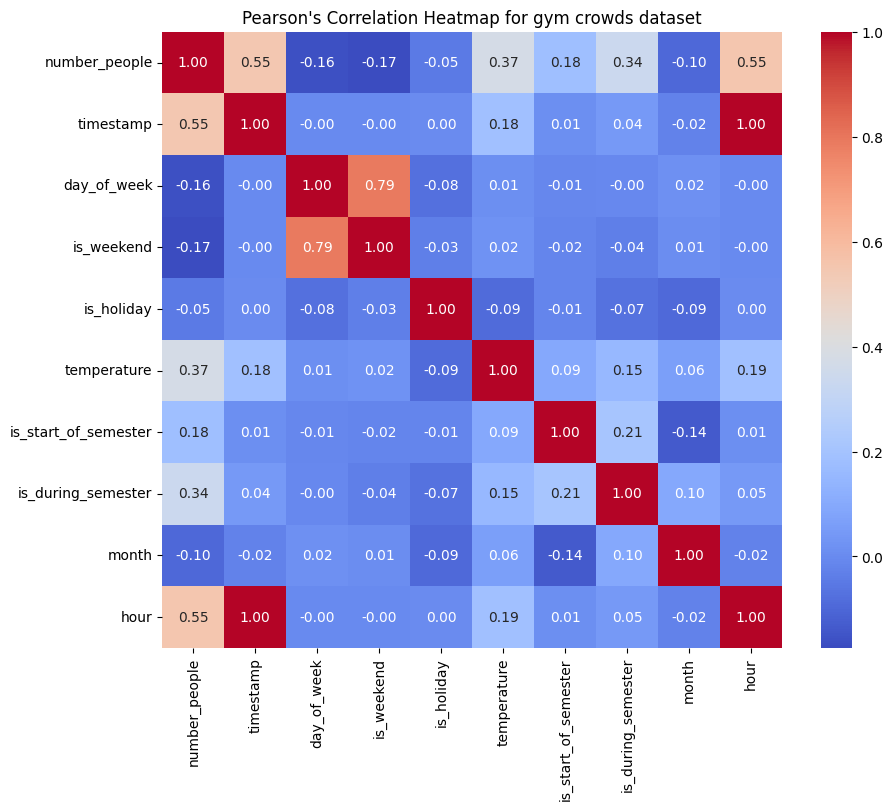

In [63]:
# Calculate Pearson's correlation coefficient
correlation_matrix = crowd_df_corr.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Pearson's Correlation Heatmap for gym crowds dataset")
plt.show()

Observations from the correlation heatmap, firstly between any variables:
- there is a perfect correlation of 1 between `hour` and `timestamp`, therefore it probably makes sense to remove one of these features. In this case, we would remove `timestamp` as its more difficult to read, plus it has a value of 0 as observed earlier.
- there is a strong positive correlation of 0.79 between `is_weekend` and `day_of_week`, suggesting that selecting both features is probably unnecessary. 
-  there is a weak positive correlation of -0..24 between `temperature` and `date_conv`, which could mean that colder temperatures depend on the time of the year / the season. Keeping both features in our dataset might make sense though.

Top correlations with the outcome `number_people` with values of < -0.1 or > 0.1
1. `hour` and `timestamp`
2. `date_conv`
3. `temperature`
4. `is_during_semester`
5. `is_start_of_semester`
6. `is_weekend`
7. `day_of_week`

Surprisingly, `month` is quite low at -0.10.  This could mean that its better to include `date_conv` in our final feature selection. However, our model will not accept datetime values, so the combination of `hour` and `month` should suffice.  

Let's look at the distribution for the outcome variable, namely `number_people`. 

array([[<Axes: title={'center': 'number_people'}>]], dtype=object)

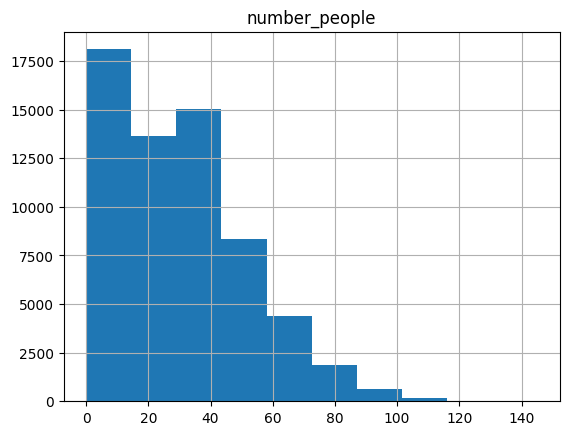

In [64]:
# plot histogram for the outcome variable
crowd_df_eda.hist('number_people')

The outcomes are higly skewed to the right - a large percentage of outcomes are leaning towards the lower number of people. We cannot use a logarithmic distribution as the outcome has some zero values, as observed earlier. 

For further insights, let's try and plot the `number_people` by the numerical columns.

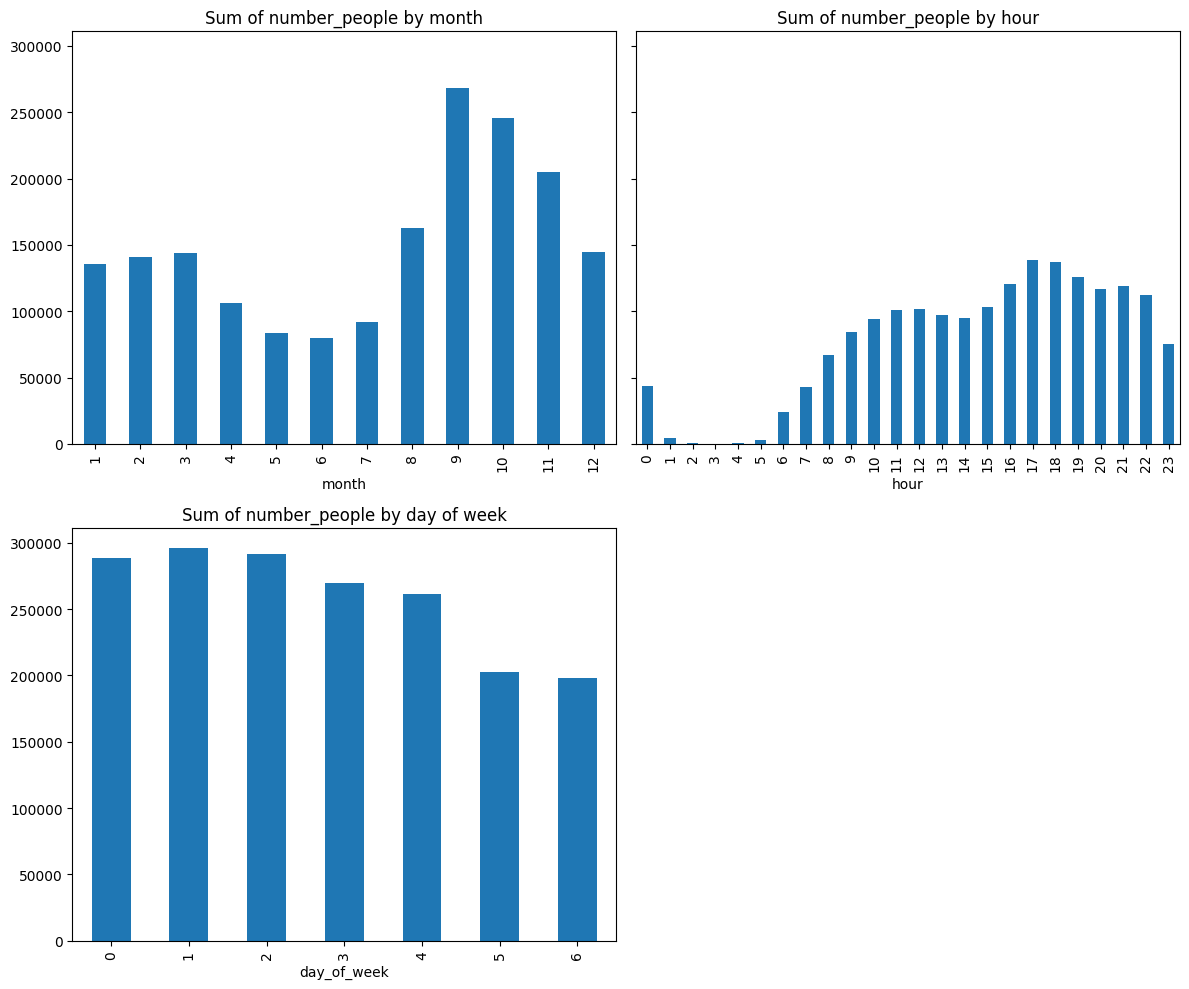

In [77]:
# Setup the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# Plot for month
crowd_df_eda.groupby('month')['number_people'].sum().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Sum of number_people by month')
axes[0, 0].ticklabel_format(style='plain', axis='y')  # Ensure normal display for y-axis

# Plot for hour
crowd_df_eda.groupby('hour')['number_people'].sum().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Sum of number_people by hour')
axes[0, 1].ticklabel_format(style='plain', axis='y')  # Ensure normal display for y-axis

# Plot for day_of_week
crowd_df_eda.groupby('day_of_week')['number_people'].sum().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Sum of number_people by day of week')
axes[1, 0].ticklabel_format(style='plain', axis='y')  # Ensure normal display for y-axis

# Remove the fourth subplot as it is empty
fig.delaxes(axes[1, 1])

# Show the plots
plt.tight_layout()
plt.show()

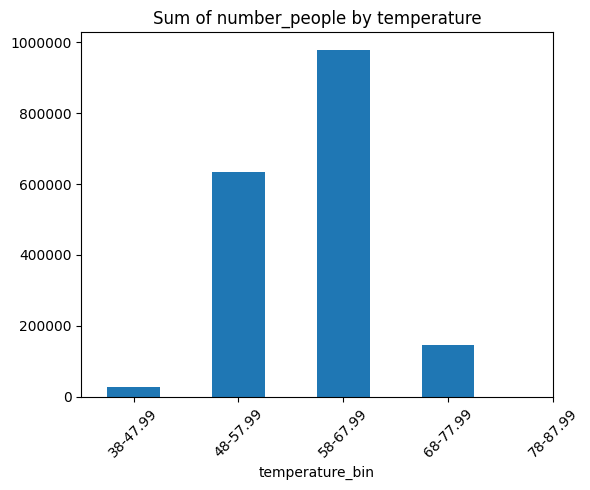

In [76]:
# Plot for temperature
fig, ax = plt.subplots(figsize=(6, 5))
temperature_bins = range(38, 88, 10)
temperature_labels = [f"{temp}-{temp+9.99}" for temp in temperature_bins]
crowd_df_eda['temperature_bin'] = pd.cut(crowd_df_eda['temperature'], bins=temperature_bins)
temperature_plot = crowd_df_eda.groupby('temperature_bin')['number_people'].sum().plot(kind='bar', ax=ax)
temperature_plot.set_title('Sum of number_people by temperature')
temperature_plot.set_xticks(range(len(temperature_labels)))
temperature_plot.set_xticklabels(temperature_labels, rotation=45)
ax.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Observations:
- by `month`: there is a peak in September, declining steadily from then, with a low in July. It seems this is a gym in the northern hemisphere, where people tend to exercise indoors in the colder months.
- by `hour`: peak times correspond with evenings
- by `day_of_week`: weekdays from Monday to Friday seem most popular
- by `temperature`: colder outside temperatures seem to attract more people to the gym. 

Again, using my experience of using gyms and being a student, the above observations make more or less sense.

### Feature selection
Finally, based on the all the observations in this section, we can select the features we think are required in our dataset for the next step.


In [66]:
# feature selection: remove unneccesary columns
crowd_df = crowd_df.drop(columns=['timestamp', 'date', 'is_weekend'])
crowd_df.head()

,number_people,day_of_week,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,71.76,0,0,8,17
1,45,4,0,71.76,0,0,8,17
2,40,4,0,71.76,0,0,8,17
3,44,4,0,71.76,0,0,8,17
4,45,4,0,71.76,0,0,8,17


## Preparing to Build Our Model  <a name="preparing"></a>

Since we're building a stochastic gradient descent regressor, we import the recommended tools we need from the SkLearn library.

In [67]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

Now we split into train and test datasets, with a 30% test size, build the model and train the model.

We use common hyperparameter values for instantiating the model.

In [68]:
X = crowd_df.drop(columns = ['number_people'], axis=1)
y = crowd_df['number_people']
print(X.info())
print(type(y))

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Instantiating the model with parameters: tolerance, learning rate and max iterations
model_sgd = SGDRegressor(tol=1e-4, eta0=1e-4, max_iter=10000, random_state=10)

# Training the model
model_sgd.fit(X_train, y_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   day_of_week           62184 non-null  int64  
 1   is_holiday            62184 non-null  int64  
 2   temperature           62184 non-null  float64
 3   is_start_of_semester  62184 non-null  int64  
 4   is_during_semester    62184 non-null  int64  
 5   month                 62184 non-null  int64  
 6   hour                  62184 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 3.3 MB
None
<class 'pandas.core.series.Series'>


SGDRegressor(eta0=0.0001, max_iter=10000, random_state=10, tol=0.0001)

## Measure the Performance of the Model  <a name="measure"></a>

In [69]:
# Make a prediction
y_pred = model_sgd.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error value: {mse:.2f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error value: {mae:.2f}")
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error value: {rmse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2*100:.2f}%")

Mean Squared Error value: 271.32
Mean Absolute Error value: 12.54
Root Mean Squared Error value: 16.47
R2 score: 46.94%


### Observations about the model performance
Once we have trained the model, we evaluate the model performance using several standard metrics from Sklearn. 
- Mean Squared Error (MSE) value: as we also calculated the root mean squared error, we will use this to evalate the performance
- Mean Absolute Error (MAE) value: this value will always be lower than the RMSE. The MAE will always not give more weight to predicted points away from the mean. For our model, we should therefore probably focus on the RMSE.
- Root Mean Squared Error (RMSE) value: the value of 16.43, is actually quite high if we consider the range of results for number of people that we observed in exploring the data:
    - min. number of people: 0
    - max. number of people: 145
    - average number of people: 29

Therefore this model could be better by having more precise predictions.
- R2 score: the score of 47% is on the lower side: less than half of the variance for the dependent variable, namely number of people, is explained by the independent variables. 

Because we have multiple independent variables in our model, let's check the adjusted R2 score.

In [70]:
# adjusted R2 score
adj_r2 = 1 - (1-r2) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)
print(f"Adjusted R2 score: {adj_r2*100:.2f}%")

Adjusted R2 score: 46.92%


The adjusted R2 score is also 47% and therefore does not help in providing a better evaluation of the model. 

### One more try: using scaled features
Because the model performance was not outstanding, let's give it one more try by scaling the features, so that all of their ranges are -1 to 1. 

Then we will build, train and evaluate a new model with the same hyperparameters as the first model but with the scaled features.

In [71]:
# Instantiate the scaler
scaler = StandardScaler()

# Fit the train data to the scaler, and produce the scaled datasets based on the scaler
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiating the scaled model with parameters: tolerance, learning rate and max iterations
model_sgd_scaled = SGDRegressor(tol=1e-4, eta0=1e-4, max_iter=10000, random_state=10)

# Training the scaled model
model_sgd_scaled.fit(X_train_scaled, y_train)

# Make a prediction using the scaled model
y_pred_scaled = model_sgd_scaled.predict(X_test_scaled)

# Evaluate the scaled model performance
mse = mean_squared_error(y_test, y_pred_scaled)
print(f"Mean Squared Error value: {mse:.2f}")
mae = mean_absolute_error(y_test, y_pred_scaled)
print(f"Mean Absolute Error value: {mae:.2f}")
rmse = root_mean_squared_error(y_test, y_pred_scaled)
print(f"Root Mean Squared Error value: {rmse:.2f}")
r2 = r2_score(y_test, y_pred_scaled)
print(f"R2 score: {r2*100:.2f}%")

Mean Squared Error value: 255.25
Mean Absolute Error value: 12.23
Root Mean Squared Error value: 15.98
R2 score: 50.08%


#### Observations
With the scaled model, using the same hyperparameters, we see a very slight improvement in the model's performance:
- RMSE improved (decreased) by 0.5
- R2 score improved (increased) by 3%

Even though its a small improvement, we will use the scaled model going forward. Also, the scaled model will be better for visualizations, as the values are not that far spaced out.

## Visualize the Results  <a name="visualize"></a>

To do a visual evaluation of our model, let's do the following:
- a residuals plot for the errors
- a line plot for comparing the predicted vs. actual outcomes

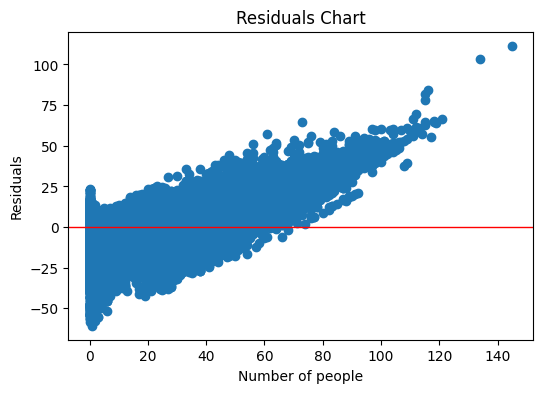

In [72]:
# Residuals chart for visualizing error
residuals = y_test - y_pred_scaled
plt.figure(figsize=(6, 4))
plt.scatter(y_test, residuals)
plt.xlabel('Number of people')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-', linewidth=1)
plt.title('Residuals Chart')
plt.show()

From the residuals chart above, it appears that the model is not performing very well. The error increases as the outcome (number of people) predicted is increasing. There appears to be a clear pattern with no clustering towards the middle line of the plot (0), so this means that a linear model may not be the most suitable for our project.

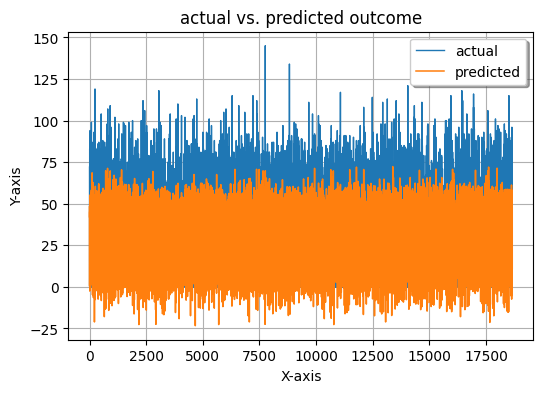

In [73]:
# Plot line chart to compare actual vs. predicted outcome
plt.figure(figsize=(6, 4))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label='actual')
plt.plot(x_ax, y_pred_scaled, linewidth=1.1, label='predicted')
plt.title("actual vs. predicted outcome")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

From the line chart above, its clear that the predicted values tend to be lower than the actual values. 

## Summarized Results  <a name="summarized"></a>

To summarize what we did:
- We sourced a dataset about crowdedness of a campus gym, with several variables and labels (outcomes), and cleaned it. With the deeper analysis of the data (EDA), we made some important conclusions even before starting the modelling. 
    If you want to avoid gym crowds, plan your gym visits:
    - during the warmer months (if you're in the northen hemisphere).
    - outside early mornings and early evenings or not during
    - on the weekends or on holidays
    - on warmer days 
    - at the start of a school semester
- We trained a ML model base on the Stochastic Gradient Descent algorithm for linear regression to predict the number of people in the gym (the outcome) based on several factors, such as time of the day, time of the year, whether its a semester start or during a semester, what the outside temperature is, what day of the week it is and whether its a holiday or not. 
- Our findings were that the model is not that good at predicting the outcome. It tended to predict a lower outcome compared to the actual data, and the residuals plot suggested that a linear regressor is not the best choice for our prediction model. 

Next steps and possible improvements:
- Based on the correlation of our variables with the outcome, we may consider discarding the variables with the weaker values, such as month and whether its a holiday or not.
- We recommend evaluating other regressors than just SGD, possibly a non-linear regressor, for example the Random Forest Regressor from SKLearn.
- We did not cover hyperparameter optimistation in this project, but when evaluating other regressors, we should include this. 